## Imports

In [2]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import sys
import os

In [3]:
sys.path.append(os.path.abspath('..'))

In [ ]:
model_path = '../models/inception_concat.keras'

In [5]:
model = tf.keras.models.load_model(model_path)

In [6]:
class_names = ['glioma', 'meningioma', 'pituitary']

In [ ]:
def predict_single_image(img_path):
    '''
    Carrega uma imagem, pré-processa e faz a previsão usando o modelo treinado.
    '''

    # Carregar imagem com tamanho 299x299 (padrão do Inception)
    img = image.load_img(img_path, target_size=(299, 299))

    # Converter para array
    img_array = image.img_to_array(img)

    # Normalizar para 0–1
    img_array = img_array / 255.0

    # Criar formato batch (1, 299, 299, 3)
    img_batch = np.expand_dims(img_array, axis=0)

    # Fazer previsão
    preds = model.predict(img_batch)
    pred_class = np.argmax(preds, axis=1)[0]
    pred_prob = preds[0][pred_class]

    # Mostrar imagem
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f'Predição: {class_names[pred_class]} ({pred_prob:.3f})')
    plt.show()

    return {
        'classe_predita': class_names[pred_class],
        'probabilidade': float(pred_prob),
        'todas_probabilidades': preds[0]
    }

1/1 [==============================] - 0s 256ms/step


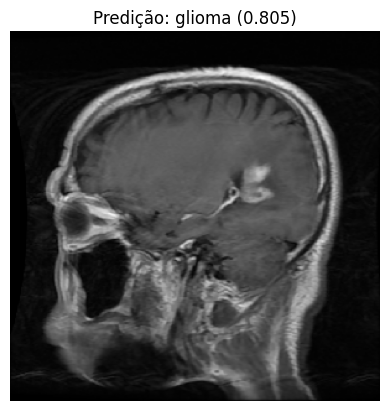

{'classe_predita': 'glioma',
 'probabilidade': 0.8053584694862366,
 'todas_probabilidades': array([0.80535847, 0.18522628, 0.00941528], dtype=float32)}

In [16]:
predict_single_image("../data/raw/glioma/870.png")